# Flow Over a Cylinder

In this work we will solve the problem of a flow over a cylider in 2D. We will start considering an incomprensible laminar (viscous) and irrotational flow. In two dimensions, the Navier-Stokes equations for this kind of fluid flow can be expressed as:

$$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}=0 $$

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} +\frac{\partial p}{\partial x} = \frac{ 1}{ Re}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)$$

$$\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} +\frac{\partial p}{\partial y} = \frac{ 1}{ Re}\left(\frac{\partial^{2} v}{\partial x^{2}}+\frac{\partial^{2} v}{\partial y^{2}}\right)$$

where $u$ is the velocity in $x$ direction, $v$ is the velocity in $y$ direction, $p$ is the pressure and  $Re$ is the Reynold's number.

In this case, since we are in 2D, it is of interest to right the above equations in terms of vorticity $\xi=\nabla \times \textbf{V}$ and the stream function $\psi$. This can be constructed as it follows:

$$\frac{\partial}{\partial y}[momentum~eq1] - \frac{\partial}{\partial x}[momentum~eq2]$$

This yields to:


$$\frac{\partial \xi}{\partial t} + u\frac{\partial \xi}{\partial x} + v\frac{\partial \xi}{\partial y} = \frac{ 1}{ Re}\left(\frac{\partial^{2} \xi}{\partial x^{2}}+\frac{\partial^{2} \xi}{\partial y^{2}}\right)~~(1)$$.

The vorticity can be expressed as:

$$\xi=\frac{\partial x}{\partial y}-\frac{\partial v}{\partial x}~~(2)$$.

At this point, we introduce the stream function:

$$u=\frac{\partial \psi}{\partial y} ~~~~ and ~~~~ v=-\frac{\partial \psi}{\partial x}~~(3)$$

and substituing (3) into (2):

$$\nabla^{2}\psi=\xi$$.

Hear we have to remember that we are considering an irrotational fluid flow, which implies that the vorticity is zero, $\xi=0$. Therefore, the equation for the stream function becomes into Laplace's equation:

$$\nabla^{2}\psi=0~~(4)$$.

In the stream function formulation, we can consider that the governing equations are (1), (3) and (4). We have to remark here that equation (4) is valid for irrotational incomprensible fluid flow in two dimensions, which is also known as Potential Flow.

## Analytical Solution 

The main idea here is to solve analitycally the Laplace's equation for a fluid flow over a cylinder. Firstly we have to remember that if $\psi_{1}$ and $\psi_{2}$ are independent solutions of equation (4), $\psi_{3} = \psi_{1} + \psi_{2}$ will also be a solution of the equation (4). 

In this case, a combination of the solution of an Uniform stream, $\psi_{U}$, + the solution of a Doublet (a combination of a source and a sink), $\psi_{D}$, yields to a flow over a cylinder, $\psi_{C}$. In cylindrical coordinates the stream function for the uniform strear reads(only considering the flow alon x direction),

$$\psi_{U}=V_{\infty}r\sin\theta$$

where $V_{\infty}$ is the free stream velocity. The stream function for the Doublet reads,

$$\psi_{D}=\frac{-\kappa}{2\pi}\frac{\sin\theta}{r}$$.

where $\kappa$ is the strenght of the doublet. And finally the solution of the flow over a cylinder reads,

$$\psi_{C}=V_{\infty}r\sin\theta\left(1-\frac{\kappa}{2\pi V_{\infty}r^{2}}\right)$$.

We can rewrite the the stream function in terms of the radious of the cylinder:

$$R^{2}=\frac{\kappa}{2\pi V_{\infty}}$$

$$\psi_{C}=V_{\infty}r\sin\theta\left(1-\frac{R^{2}}{r^{2}}\right)$$.

First we will import all the modules we will need along the hole problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

We will start plotting this solution. So lets build firstly the cylinder. The equation of a circunference is expressed as:

$$x^{2}+y^{2}=R^{2}$$

Solving for y,

$$y=\sqrt{R^{2}-x^{2}}$$

$$\frac{y}{R}=\sqrt{1-\left(\frac{x}{R}\right)^{2}}$$

$$Y=\sqrt{1-X^{2}}$$

We continue building the y function and ploting it

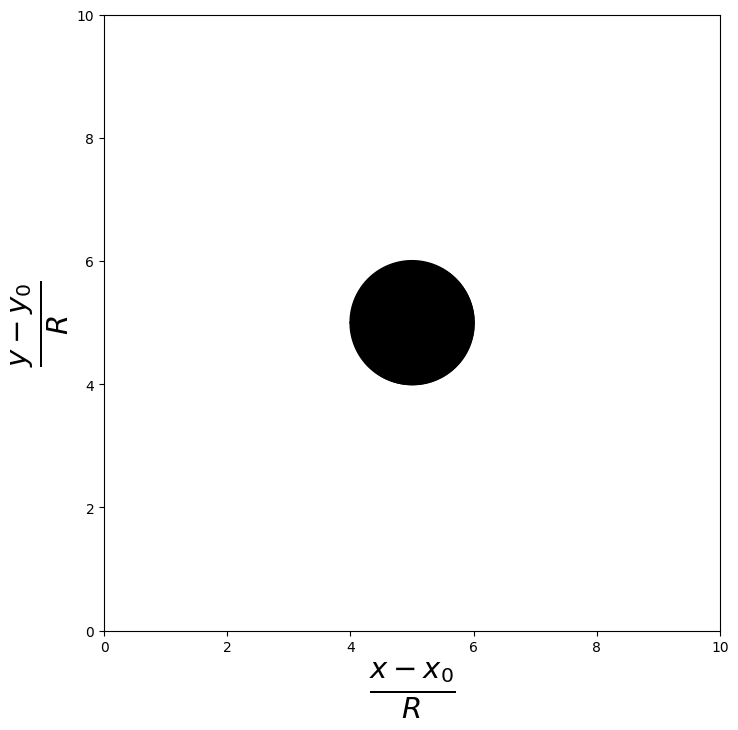

In [31]:
import numpy as np
import matplotlib.pyplot as plt

points = 500                    # Quantity of points
R = 1.0                         # Radius
X = np.linspace(4, 6, points)   # Generate X points from 4 to 6
Y = np.zeros(points)            # Generate Y vector

# Fill Y vector
for i in range(points):
    if 4 <= X[i] <= 6:
        Y[i] = np.sqrt(1 - ((X[i] - 5) ** 2))

# And plot it now
fontsize = 30
plt.figure(figsize=(8, 8))
plt.xlabel(r"$\frac{x - x_0}{R}$", fontsize=fontsize)
plt.ylabel(r"$\frac{y - y_0}{R}$", fontsize=fontsize)
plt.xlim(0, 10)
plt.ylim(0, 10)
# Plot the points
plt.plot(X, Y + 5, color="black")
plt.plot(X, -Y + 5, color="black")

# Fill the area between the two curves with black
plt.fill_between(X, Y + 5, -Y + 5, color="black")
plt.gca().set_aspect('equal', adjustable='box')  # Ensure aspect ratio is equal
plt.show()


Now we plot the $\psi_{c}$ stream function

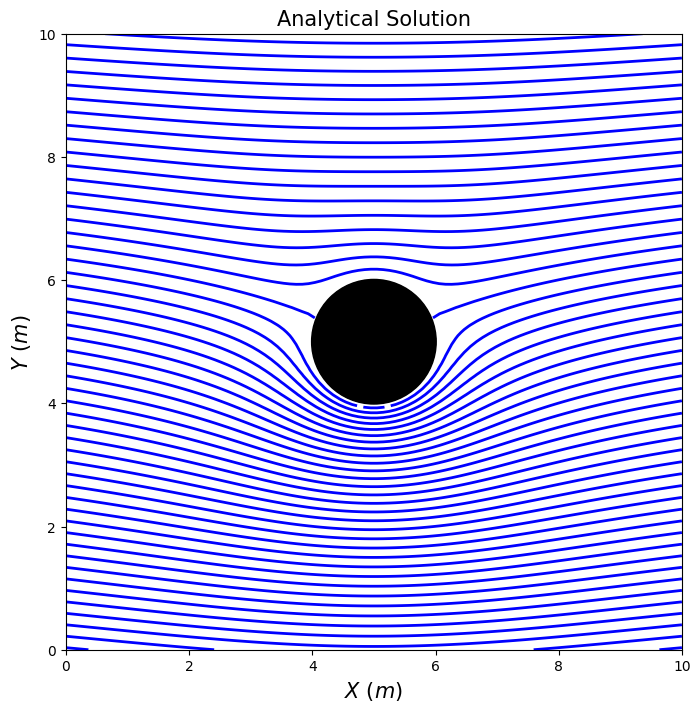

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
V_if = 1.0          # Free stream velocity
R = 1.0             # Radius of the cylinder
points = 100        # Number of points for the grid

# Define the grid around the cylinder
XX = np.linspace(0, 10, points)
YY = np.linspace(0, 10, points)
x, y = np.meshgrid(XX, YY)
x_centered = x - 5  # Centering the grid at (5, 5)
y_centered = y - 5
r = np.sqrt(x_centered**2 + y_centered**2)

# Calculate the stream function, but set values inside the cylinder to NaN
psi_C = np.empty_like(r)
psi_C.fill(np.nan)  # Fill psi_C with NaN initially
psi_C[r > R] = V_if * r[r > R] * np.sin(np.arctan2(y_centered[r > R], x_centered[r > R])) * (1 - (R / r[r > R])**2) - (0.5/2.0*np.pi)*np.log(r[r>R]/R) # add or rest the last part for static and rotating cylinder.

plt.figure(figsize=(8, 8))
contour = plt.contour(x, y, psi_C, levels=60, colors='blue', linewidths=2.0)

# Set linestyles to 'solid' for all levels to remove dashed lines
for contour_level in contour.collections:
    contour_level.set_linestyle('solid')

plt.xlim(0, 10)
plt.ylim(0, 10)

# Plot the cylinder
circle = plt.Circle((5, 5), R, fill=False, color='black', linewidth=2.0)
plt.gca().add_patch(circle)

# Fill the cylinder with black color
circle = plt.Circle((5, 5), R, fill=True, color='black')
plt.gca().add_patch(circle)


fontsize = 15
plt.title("Analytical Solution", fontsize = fontsize)
plt.xlabel(r"$X~(m)$", fontsize=fontsize)
plt.ylabel(r"$Y~(m)$", fontsize=fontsize)
plt.savefig("Analytical_Cylindric_Flow_Anticlock.pdf",bbox_inches='tight')
plt.gca().set_aspect('equal')
plt.show()


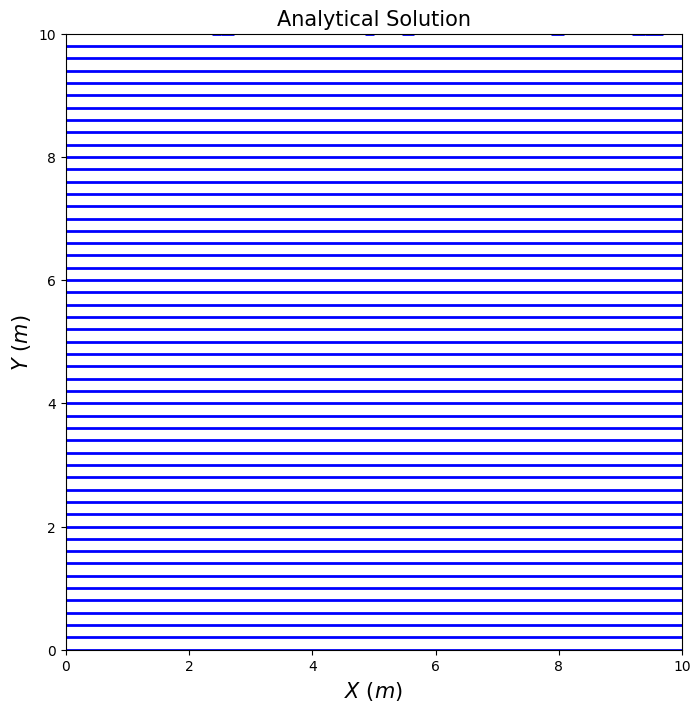

In [38]:
# Parameters
V_if = 1.0          # Free stream velocity
R = 1.0             # Radius of the cylinder
points = 100        # Number of points for the grid

XX = np.linspace(0, 10, points)
YY = np.linspace(0, 10, points)
x, y = np.meshgrid(XX, YY)
r = np.sqrt(x**2 + y**2)

# Calculate the stream function, but set values inside the cylinder to NaN
psi_C = np.empty_like(r)
psi_C.fill(np.nan)  # Fill psi_C with NaN initially
psi_C = V_if * r * np.sin(np.arctan2(y, x))

plt.figure(figsize=(8, 8))
contour = plt.contour(x, y, psi_C, levels=60, colors='blue', linewidths=2.0)

# Set linestyles to 'solid' for all levels to remove dashed lines
for contour_level in contour.collections:
    contour_level.set_linestyle('solid')

plt.xlim(0, 10)
plt.ylim(0, 10)
fontsize=15
# Plot the points
#plt.plot(X, Y, color = "black")
#plt.plot(X,-Y, color = "black")
# Fill the area between the two curves with black
#plt.fill_between(X, Y, -Y, color="black")

plt.title("Analytical Solution", fontsize=fontsize)
plt.xlabel(r"$X~(m)$", fontsize=fontsize)
plt.ylabel(r"$Y~(m)$", fontsize=fontsize)
plt.gca().set_aspect('equal')
plt.savefig("Analytical_Perallel_Flow.pdf",bbox_inches='tight')
plt.show()

The velocity can be obtained directly from the stream function, $\textbf{V} = \nabla \psi$:

$$V_{r}=\frac{\partial \psi}{\partial r} = V_{\infty}\left(1-\frac{R^{2}}{r^{2}}\right)\cos\theta$$

$$V_{\theta}=\frac{1}{r}\frac{\partial \psi}{\partial \theta} = -V_{\infty}\left(1+\frac{R^{2}}{r^{2}}\right)\sin\theta$$

And remember that the total velocity is: $\textbf{V}=\sqrt{V_{r}^{2}+V_{\theta}^{2}}$

If we want to obtain the velocities in terms of cartesian velocities, $V_{x}$ and $V_{y}$, we should make the following changes:

$$V_{x}=V_{r}\cos\theta-rV_{\theta}\sin\theta$$
$$V_{y}=V_{r}\sin\theta+rV_{\theta}\cos\theta$$

## Introducing Pressure

To solve the pressure equation, we will now consider that we are in an unviscic, irrotational and incompresinble fluid flow over a cylinder. These assuptions implies that the governing equations of the system are simply the Euler equations. The pressure can be simply obtained from Bernoulli's principle so that:

$$p=\frac{1}{2}\rho\left(V_{\infty}^{2}-V^{2}\right) + p_{\infty}$$

As we know that $V=\sqrt{V_{r}^{2}+V_{\theta}^{2}}$, the pressure equation can be written in terms of $\theta$ and $r$:

$$p=\frac{1}{2}\rho V_{\infty}^{2}\left(2\frac{R^{2}}{r^{2}}\cos(2\theta)-\frac{R^{4}}{r^{4}}\right) + p_{\infty}$$

So lets solve this pressure equation.